In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=a57b83b2ee713aa3839593fb51a3fea00b956e94a90618e916ca5589874f57e6
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
import nltk
import math
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
os.chdir("/content/drive/My Drive/IRProject")

In [5]:
# Read the csv file
df = pd.read_csv('covid_df_10000.csv')
df

,Unnamed: 0,doc_id,title,abstract,text_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...,...
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9997,9998,8126a598911ae325a6ebf1e1ca2fb9ae08cc73a2,NaN,NaN,as a means of preventing transmission (Chu et ...
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [6]:
# Drop the first column of the dataframe
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
9995,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9997,8126a598911ae325a6ebf1e1ca2fb9ae08cc73a2,NaN,NaN,as a means of preventing transmission (Chu et ...
9998,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [7]:
# Drop rows with NaN values in the 'text_body' column and 'abstract' columns
df = df.dropna(subset=['text_body', 'abstract'])
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
9993,2755fa83e1650b83aed9552391340218211be5f6,NaN,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...
9995,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9998,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [8]:
# Replace cells with NaN values in the 'title' column with ''. We maintain these rows as documents' contents are a priority.
print("The number of NaNs in the title column is: ",  df['title'].isna().sum())
df['title'] = df['title'].fillna('')
df

The number of NaNs in the title column is:  334


<ipython-input-8-78e3d4fb7465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].fillna('')


,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
9993,2755fa83e1650b83aed9552391340218211be5f6,,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...
9995,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,a6f37939b6a069def17ff724d2d49bbb41ce8f82,,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9998,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [9]:
# Function to detect the language of the text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Remove non-English rows
df['language'] = df['text_body'].apply(detect_language)
df = df[df['language'] == 'en']
df

<ipython-input-9-b063df0b0133>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['text_body'].apply(detect_language)


,doc_id,title,abstract,text_body,language
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en
...,...,...,...,...,...
9993,2755fa83e1650b83aed9552391340218211be5f6,,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...,en
9995,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...,en
9996,a6f37939b6a069def17ff724d2d49bbb41ce8f82,,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20...",en
9998,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...,en


In [18]:
# Define a function for preprocessing text
def preprocess(text):

    # Tokenize the text into words and convert to lowercase
    word_tokens = nltk.word_tokenize(text.lower())

    # Remove punctuation
    word_tokens_punct = [word for word in word_tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    removing_stopwords = [word for word in word_tokens_punct if word not in stop_words]

    # Apply stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(word) for word in removing_stopwords]

    return stemmed_tokens

    

In [19]:
# Tokenize the title and text_body columns of the DataFrame
tokenized_corpus = []
for index, row in df.iterrows():
    # Tokenize the title column if it is a string, otherwise use an empty list
    if type(row['title']) == str:
        title_tokens = preprocess(row['title'])
    else:
        title_tokens = []

    # Tokenize the abstract column if it is a string, otherwise use an empty list
    if type(row['text_body']) == str:
        text_body_tokens = preprocess(row['text_body'])
    else:
        text_body_tokens = []

    # Combine the title and abstract tokens into a single document
    tokenized_corpus.append(title_tokens + text_body_tokens)

In [21]:
tokenized_corpus[:2]

[['long',
  'term',
  'predictor',
  'breathless',
  'exercis',
  'intoler',
  'chronic',
  'fatigu',
  'hospit',
  'patient',
  'cohort',
  'studi',
  'month',
  'median',
  'million',
  'coronavirus',
  'diseas',
  'diagnos',
  'around',
  'world',
  'mani',
  'requir',
  'hospit',
  'care',
  'past',
  'month',
  'enhanc',
  'emphasi',
  'gradual',
  'move',
  'care',
  'survivor',
  'base',
  'recent',
  'data',
  'million',
  'patient',
  'recov',
  'acut',
  'experienc',
  'linger',
  'symptom',
  'lead',
  'disabl',
  'impair',
  'daili',
  'life',
  'activ',
  'various',
  'term',
  'use',
  'describ',
  'condit',
  'patient',
  'fail',
  'return',
  'baselin',
  'health',
  'state',
  'includ',
  'sequela',
  'covid',
  'syndrom',
  'pac',
  'long',
  'covid',
  'articl',
  'use',
  'term',
  'pac',
  'henceforth',
  'preval',
  'various',
  'pac',
  'symptom',
  'examin',
  'systemat',
  'review',
  'studi',
  'publish',
  'till',
  'march',
  'acut',
  'phase',
  'week',
  '

In [22]:
# Define a function for computing the inverse document frequency of a term
def idf(token, tokenized_corpus):
    N = len(tokenized_corpus)
    n_q = sum(1 for doc in tokenized_corpus if token in doc)
    return math.log((N - n_q + 0.5) / (n_q + 0.5))

In [23]:
# Define a function for computing the BM25 score between a query and a document
def bm25(query_tokens, doc_tokens, tokenized_corpus, k1=1.5, b=0.75):
    doc_len = len(doc_tokens)
    avg_doc_len = sum(len(doc) for doc in tokenized_corpus) / len(tokenized_corpus)
    score = 0

    for token in query_tokens:
        # Skip the token if it is not present in the document
        if token not in doc_tokens:
            continue

        f_q = doc_tokens.count(token)
        term_idf = idf(token, tokenized_corpus)
        numerator = f_q * (k1 + 1)
        denominator = f_q + k1 * (1 - b + b * (doc_len / avg_doc_len))
        score += term_idf * (numerator / denominator)

    return score

In [24]:
# Define a function for searching the DataFrame using a query string
def search(query, tokenized_corpus, top_n=10):
    # Preprocess the query string into tokens
    query_tokens = preprocess(query)

    # Compute the BM25 scores between the query and each document in the corpus
    scores = [bm25(query_tokens, doc_tokens, tokenized_corpus) for doc_tokens in tokenized_corpus]

    # Get the indices of the top n scores in descending order
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:top_n]

    # Get the BM25 scores of the top n documents
    top_scores = [scores[i] for i in top_indices]

    # Return the DataFrame rows and scores corresponding to the top n scores
    return df.iloc[top_indices], top_scores

**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community
Top 10 results for the query 'transmission of virus in community':

Title: Asymptomatic SARS-CoV-2 Transmission from Community Contacts in Healthcare Workers
Body Text: Without a vaccine or antiviral therapy for the newly recognized COVID-19 pandemic, social distancing may be the only current means to effectively slow the spread of the novel coronavirus SARS-CoV-2. Most states have enacted shelter in place orders to reduce an individual's risk of infection. But, social distancing is not an option for many, including the millions of healthcare workers still providing important and necessary healthcare. According to a recent survey conducted by the Physicians Foundation, doctors in general see an average of 20 patients per day outside of the current epidemic in addition to interactions with their healthcare team. 1 Healthcare providers rely on the use of personal protective equipment (PPE) to reduce the risk of infections from t

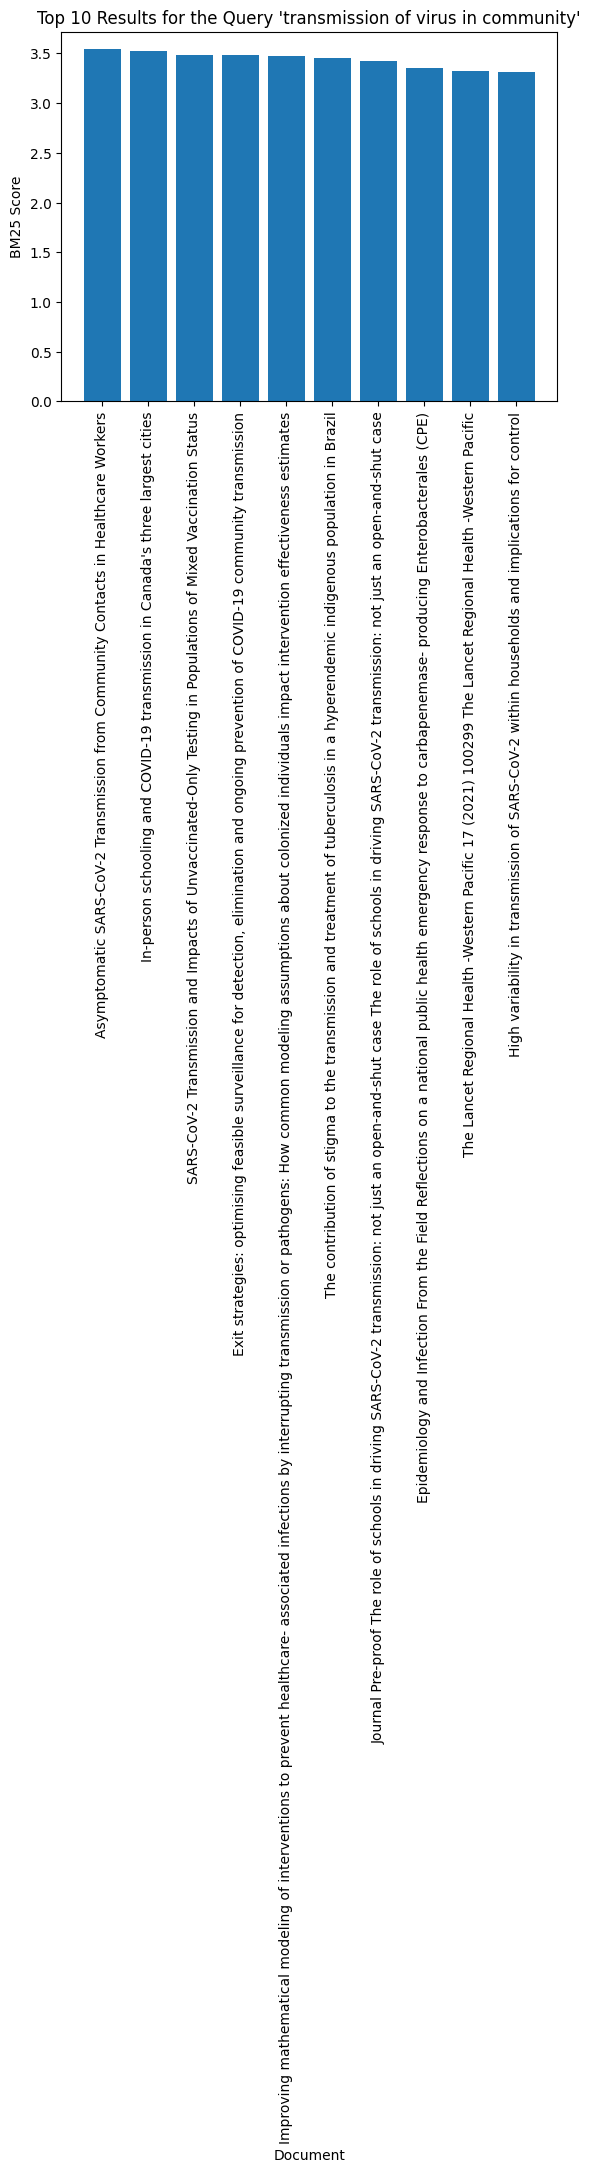

In [26]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

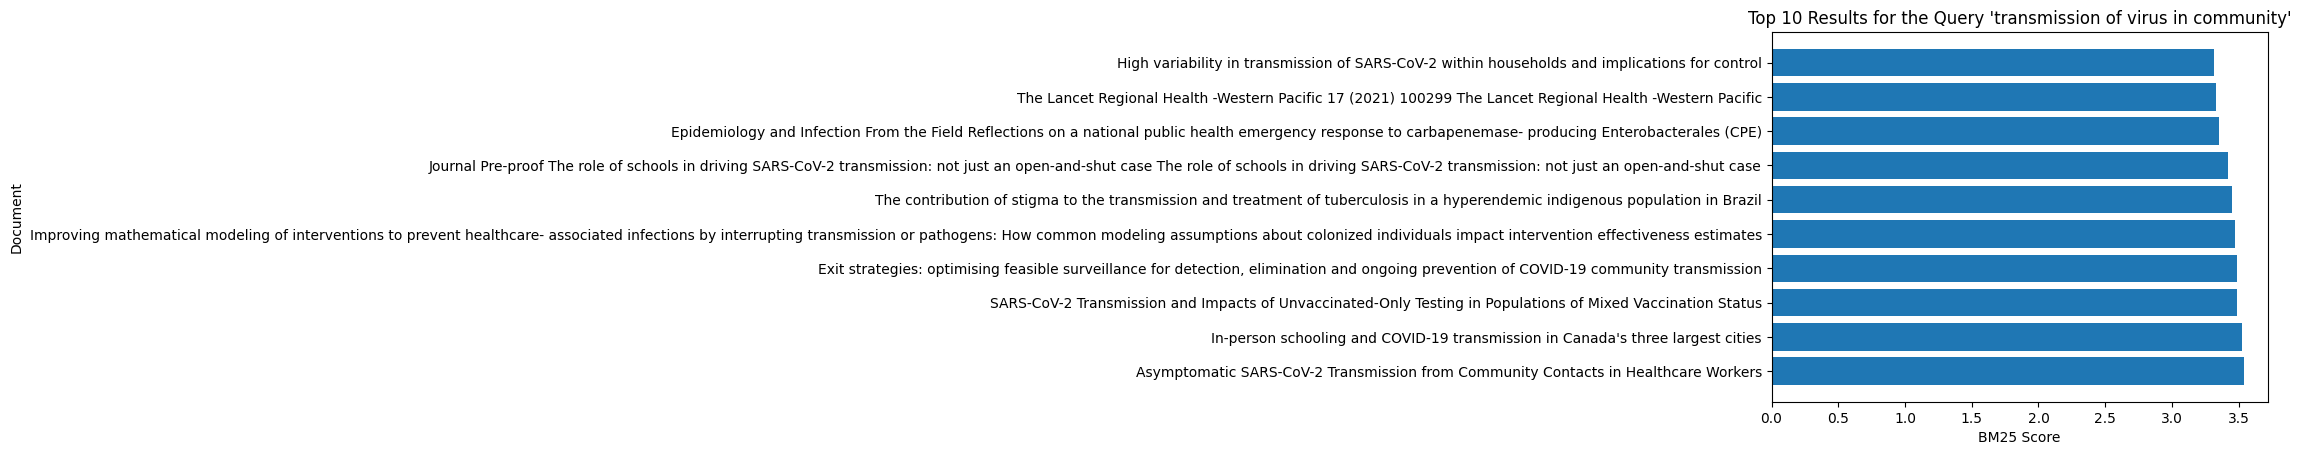

In [32]:
fig, ax = plt.subplots()
ax.barh(range(len(scores)), scores)
ax.set_yticks(range(len(results)))
ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
ax.set_title(f"Top {top_n} Results for the Query '{query}'")
ax.set_ylabel("Document")
ax.set_xlabel("BM25 Score")
plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period
Top 10 results for the query 'range of incubation period':

Title: Glyceraldehyde-3-phosphate dehydrogenase (GAPDH) moonlights as an adhesin in Mycoplasma hyorhinis adhesion to epithelial cells as well as a plasminogen receptor mediating extracellular matrix degradation
Body Text: The cell wall-less members of the Mycoplasma genus are commensal, opportunistic or pathogenic bacteria that can colonize in humans, animals and plants. Various Mycoplasma species are considered pathogenic to swine, including Mycoplasma hyopneumoniae, Mycoplasma hyorhinis, Mycoplasma suis and Mycoplasma hyosynoviae [1] . M. hyorhinis is ubiquitous in the pig population and can be found in the respiratory tract of both healthy animals and those showing clinical signs of M. hyorhinis infection. Most colonized pigs show no apparent clinical manifestation of disease. The occurrence of disease is often related to the systemic invasion of the pathogen. Clinical sig

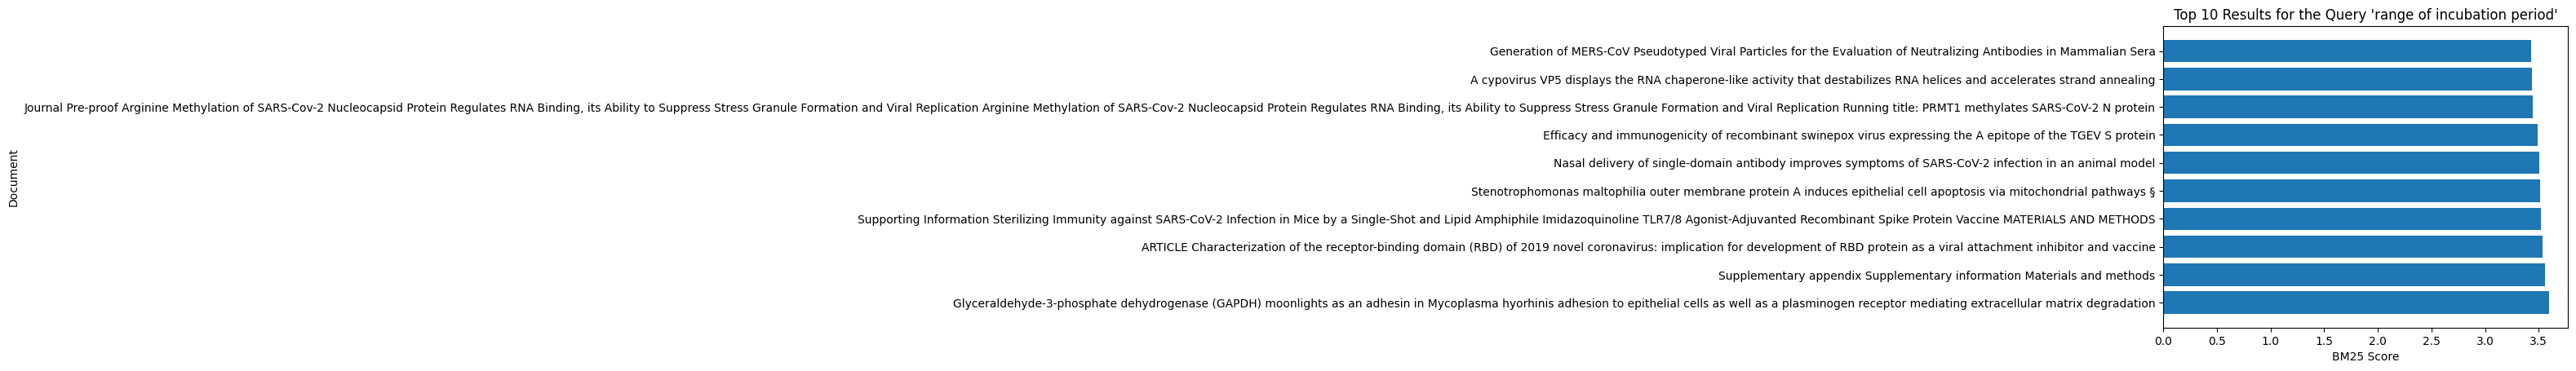

In [33]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks
Top 10 results for the query 'seasonal outbreaks':

Title: 1 Inference and forecast of H7N9 influenza in China
Body Text: Wild birds, particularly Anseriformes and Charadriformes, are thought to be the principal natural reservoir of low pathogenic avian influenza (LPAI) viruses [1, 2] , as well as the source of influenza A viruses infecting all other animals [3] . Indeed, LPAI includes nearly all influenza subtypes, and wild bird migration can bring viruses to new areas and species [1, 4] . The LPAI A(H7N9) virus was first identified in humans in China in early 2013 [5] . As at 15 October 2015, 678 confirmed human infections have been documented, with a case fatality rate of ca 40% [6] . The virus most probably originated in wild bird populations [7, 8] , was introduced into domestic ducks and chickens and has since become well established in poultry populations in south-eastern China [6] . Transmission to humans occurs primarily at live bird

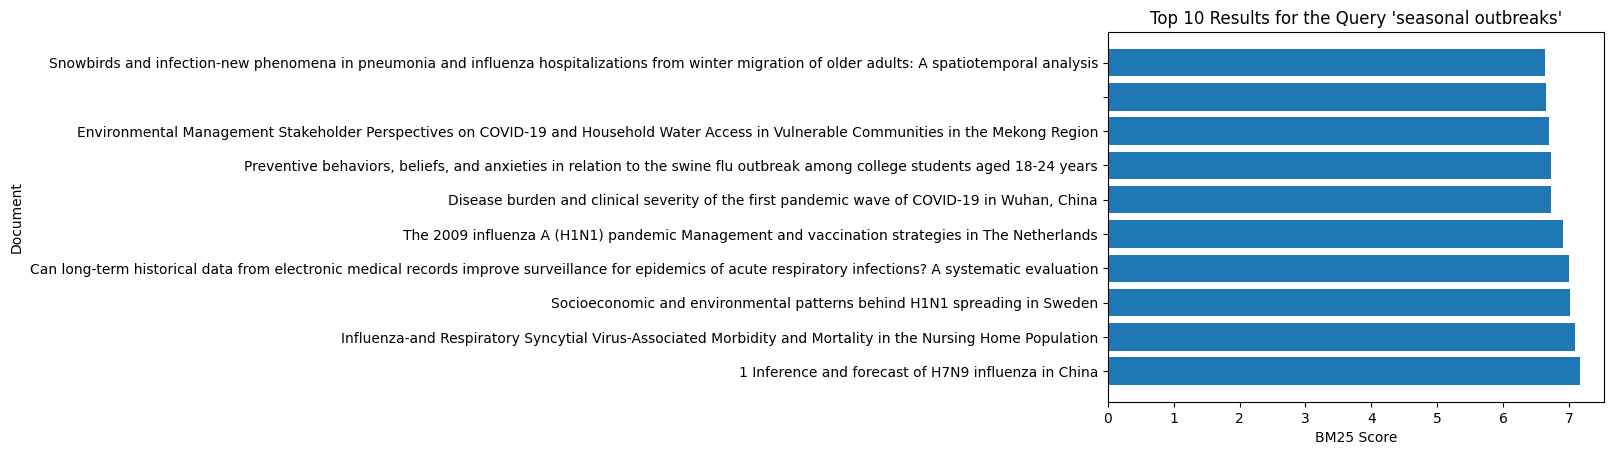

In [34]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus
Top 10 results for the query 'effect of environment factors on virus':

Title: Virtual external implementation facilitation: successful methods for remotely engaging groups in quality improvement
Body Text: Summary: These principles represent a novel conceptualization of virtual external implementation facilitation, giving structure to a process that has been, to date, inadequately described. The associated actions are demonstrably useful in supporting the principles and offer teams interested in virtual external implementation facilitation concrete methods by which to ensure success. Our examples stem from experiences in healthcare. But the principles can, in theory, be applied to virtual external implementation facilitation regardless of setting, as they and the associated actions are not setting specific.
 Keywords: Implementation facilitation, External facilitation, Virtual, Methods, Quality improvement, Remote, Strate

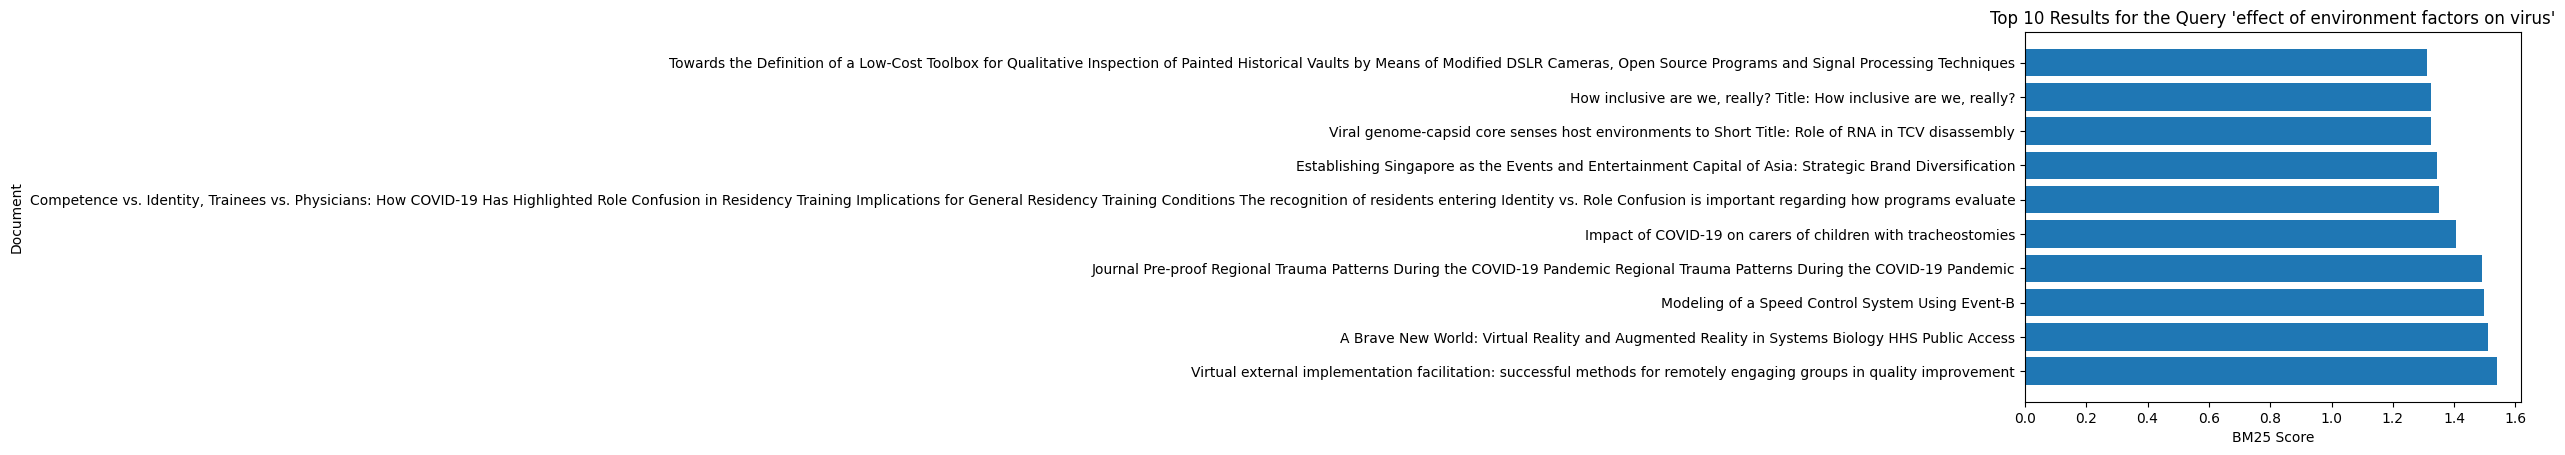

In [35]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces
Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Title: Journal Pre-proof Exhaled gas decontamination by connecting a ventilator exhaust port with an underwater seal system to prevent COVID-19 spread Title
Body Text: Airborne infection isolation rooms with negative pressure are not universally available, especially in resource-limited settings like outbreak of corona virus infectious disease-19 .Intensive care unit preparedness in the setting of COVID-19 pandemics have been focused on broad concepts of infection control, increasing staffing capacity, and community engagement. [1] Aerosol-generating procedures should be performed on ICU patients with COVID-19 in a negative pressure room to avoid cross-contamination during the SARS epidemic. [2] Other infection precautions for mechanically ventilated patient include the use of closed systems and dual limb circuitry with a Hi

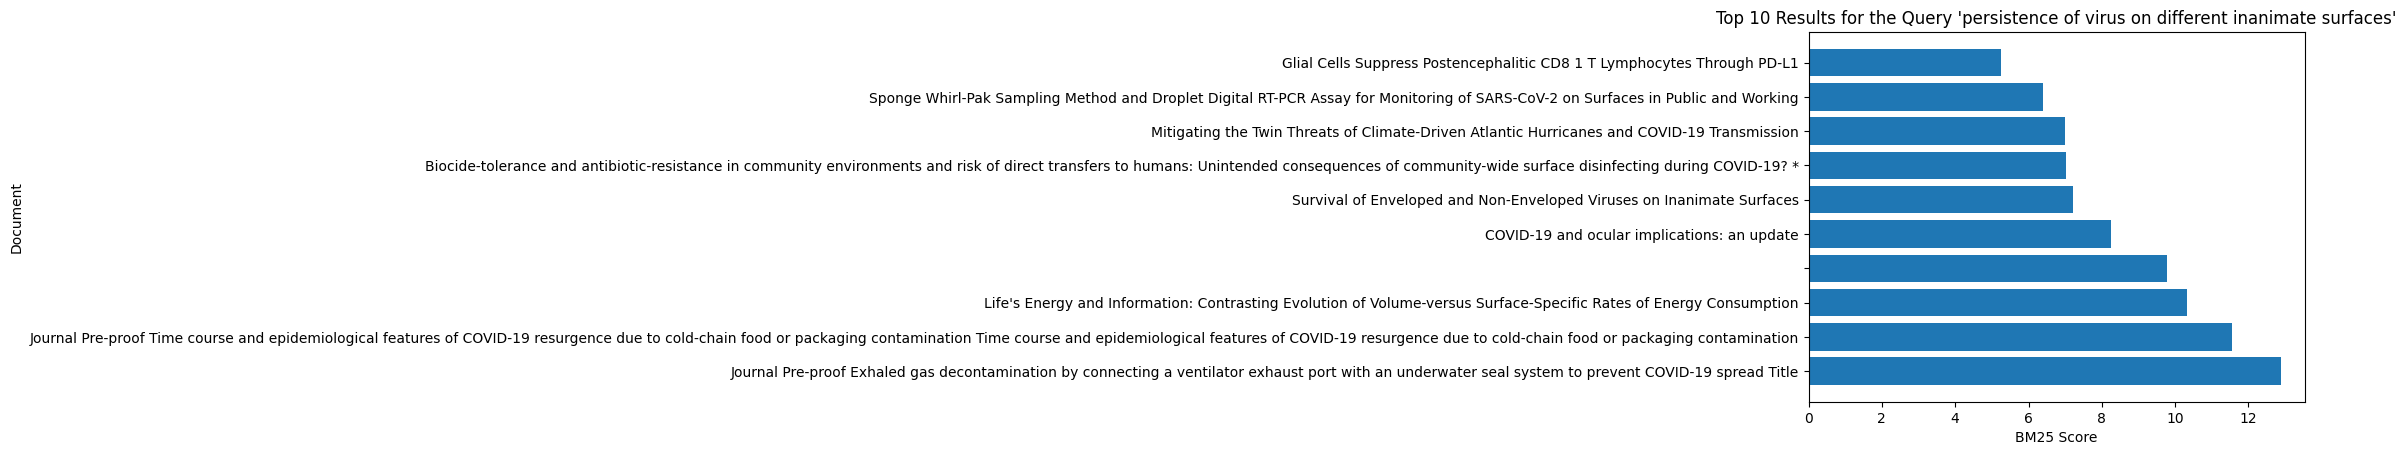

In [36]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nBody Text: {row['text_body']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

# Let us repeat the same steps for the 'abstract' column instead of the 'text_body, i.e. search through the documents' abstracts and not body texts. We then will observe which embeddings yield higher similarity scores for the queries.

In [37]:
# Tokenize the title and abstract columns of the DataFrame
tokenized_corpus = []
for index, row in df.iterrows():
    # Tokenize the title column if it is a string, otherwise use an empty list
    if type(row['title']) == str:
        title_tokens = preprocess(row['title'])
    else:
        title_tokens = []

    # Tokenize the abstract column if it is a string, otherwise use an empty list
    if type(row['abstract']) == str:
        abstract_tokens = preprocess(row['abstract'])
    else:
        abstract_tokens = []

    # Combine the title and abstract tokens into a single document
    tokenized_corpus.append(title_tokens + abstract_tokens)

In [38]:
tokenized_corpus[:2]

[['long',
  'term',
  'predictor',
  'breathless',
  'exercis',
  'intoler',
  'chronic',
  'fatigu',
  'hospit',
  'patient',
  'cohort',
  'studi',
  'month',
  'median',
  'j',
  'u',
  'r',
  'n',
  'l',
  'p',
  'r',
  'e',
  'r',
  'f'],
 ['emerg',
  'univers',
  'transmiss',
  'dynam',
  'complex',
  'involv',
  'model',
  'transmiss',
  'dynam',
  'roadblock',
  'achiev',
  'predict',
  'spread',
  'contain',
  'diseas',
  'addit',
  'understand',
  'mode',
  'transmiss',
  'effect',
  'mitig',
  'method',
  'also',
  'need',
  'built',
  'effect',
  'model',
  'make',
  'predict',
  'show',
  'complex',
  'circumv',
  'appeal',
  'scale',
  'principl',
  'lead',
  'emerg',
  'univers',
  'transmiss',
  'dynam',
  'diseas',
  'ensu',
  'data',
  'collaps',
  'render',
  'transmiss',
  'dynam',
  'larg',
  'independ',
  'geopolit',
  'variat',
  'effect',
  'various',
  'mitig',
  'strategi',
  'popul',
  'demograph',
  'etc',
  'propos',
  'simpl',
  'blue',
  'sky',
  'show',


**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community
Top 10 results for the query 'transmission of virus in community':

Title: Transmission patterns and evolution of respiratory syncytial virus in a community outbreak identified by genomic analysis
Abstract: Detailed information on the source, spread and evolution of respiratory syncytial virus (RSV) during seasonal community outbreaks remains sparse. Molecular analyses of attachment (G) gene sequences from hospitalized cases suggest that multiple genotypes and variants co-circulate during epidemics and that RSV persistence over successive seasons is characterized by replacement and multiple new introductions of variants. No studies have defined the patterns of introduction, spread and evolution of RSV at the local community and household level. We present a whole genome sequence analysis of 131 RSV group A viruses collected during 6-month household-based RSV infection surveillance in Coastal Kenya, 2010 within an area of 12 km

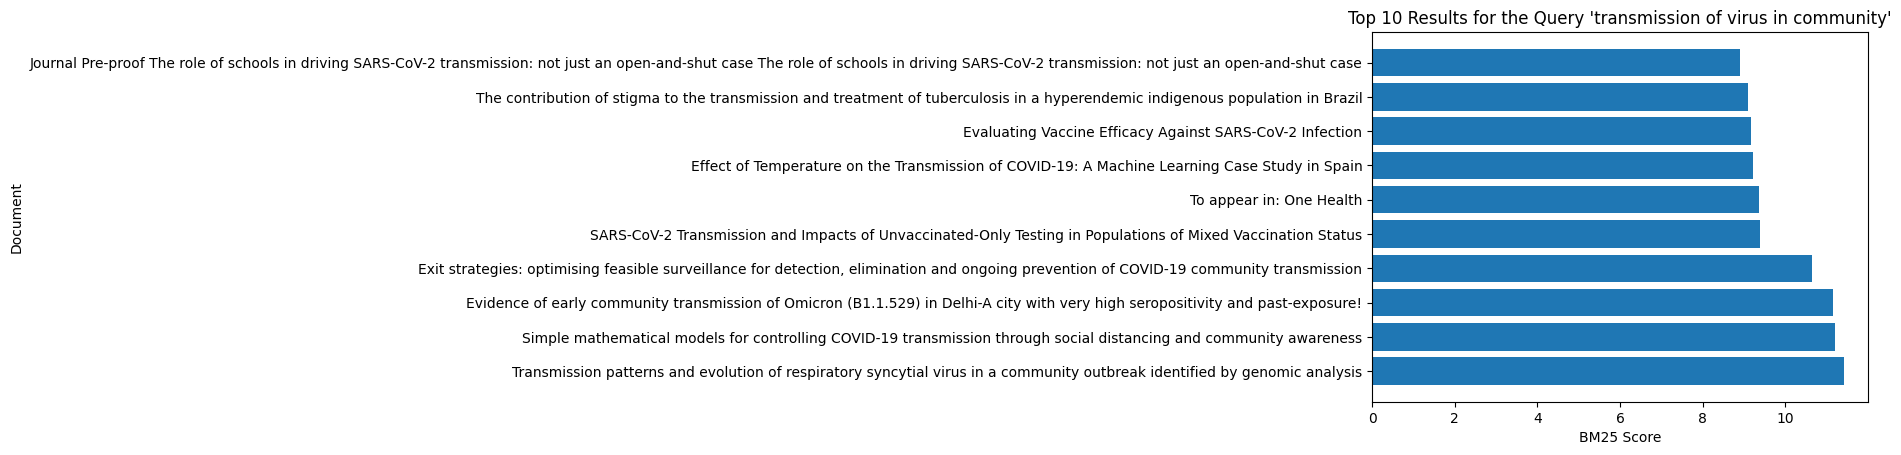

In [39]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period
Top 10 results for the query 'range of incubation period':

Title: Transmission of corona virus disease 2019 during the incubation period may lead to a quarantine loophole
Abstract: The ongoing outbreak of novel corona virus disease 2019 in Wuhan, China, is arousing international concern. This study evaluated whether and when the infected but asymptomatic cases during the incubation period could infect others.
 We collected data on demographic characteristics, exposure history, and symptom onset day of the confirmed cases, which had been announced by the Chinese local authorities. We evaluated the potential of transmission during the incubation period in 50 infection clusters, including 124 cases. All the secondary cases had a history of contact with their first-generation cases prior to symptom onset.
 The estimated mean incubation period for COVID-19 was 4.9 days (95% confidence interval [CI], 4.4 to 5.4) days, ranging from 0.8 to 1

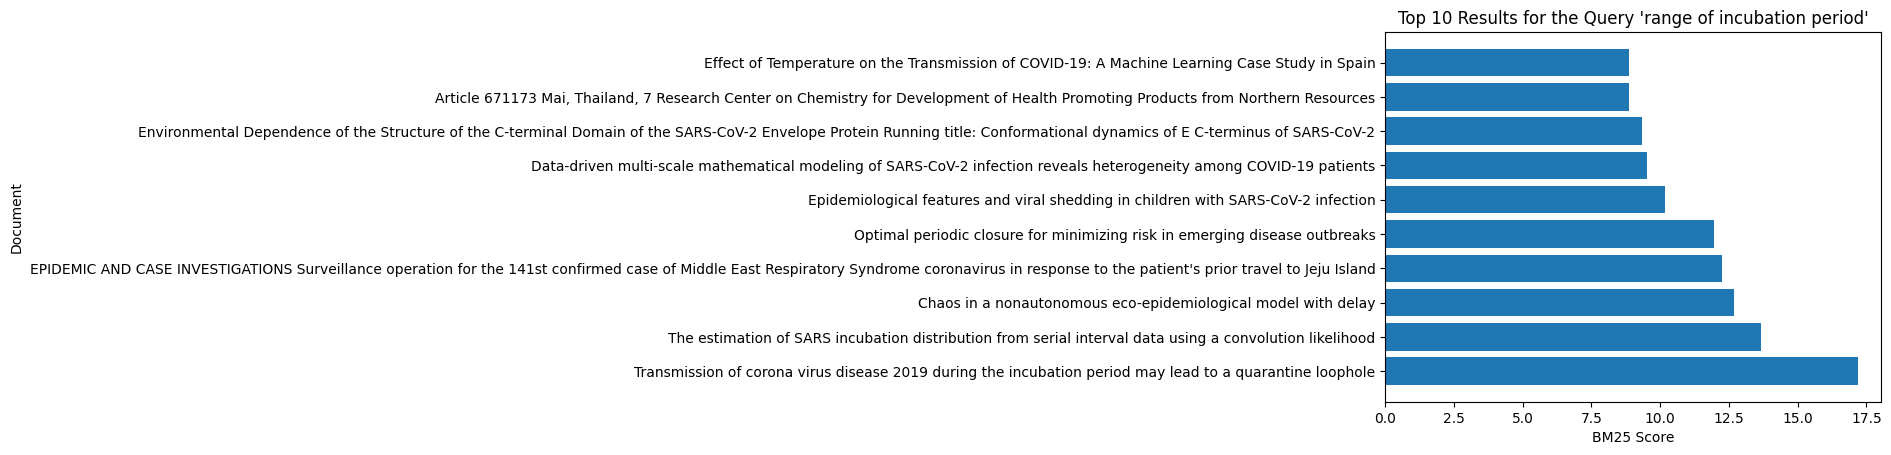

In [40]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks
Top 10 results for the query 'seasonal outbreaks':

Title: Title: Delayed Start of the Respiratory Syncytial Virus Epidemic at the End of the 20/21 Northern Hemisphere Winter Season, Lyon, France
Abstract: The implementation of Non Pharmaceutical Interventions (NPI), triggered by the emergence of covid-19, decrease the RSV circulation. Data, from our ongoing surveillance; show a late introduction of RSV at the end of December and a 4 month delayed epidemic start without significant change in our NPI policy. This data indicates that RSV still have the potential to give a late season outbreak in northern hemisphere. RSV surveillance should be reinforced and RSV Pharmaceutical Interventions maintained for at risk neonate
Score: 10.401149063042977

Title: Socioeconomic and environmental patterns behind H1N1 spreading in Sweden
Abstract: Identifying the critical factors related to influenza spreading is crucial in predicting and mitigating epidemi

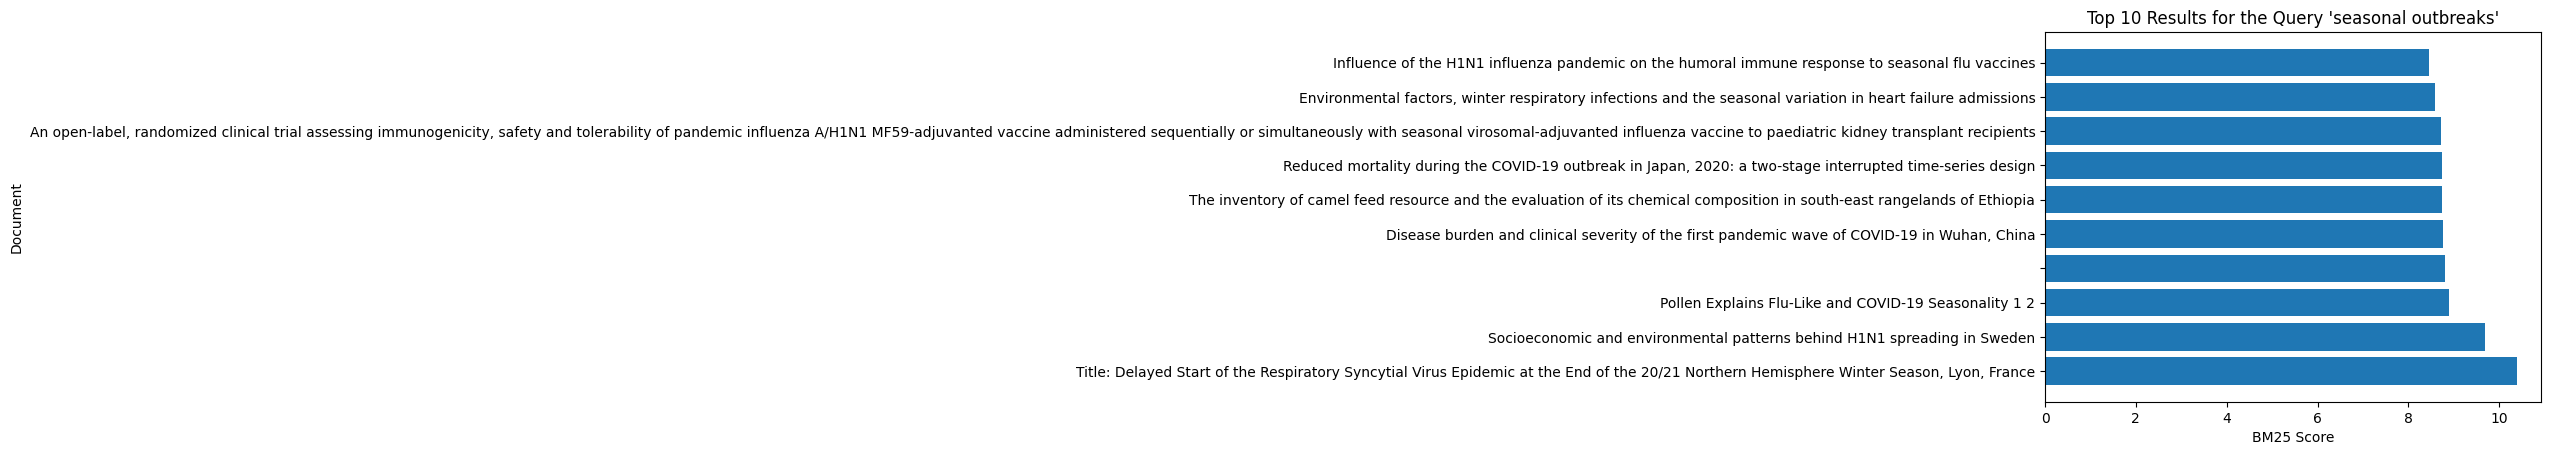

In [41]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus
Top 10 results for the query 'effect of environment factors on virus':

Title: Examining the Moderation Effect of Political Trust on the Linkage between Civic Morality and Support for Environmental Taxation
Abstract: Climate change and pollution are threatening sustainable environments and human life. To mitigate and adapt to the effects of such threats, governments around the world need significant financial resources. Accordingly, this study focuses on which factors are associated with individuals' support for taxation to protect the environment and pays special attention to the direct effects of civic morality and political trust, as well as their joint effects on support for environmental taxation. Ordered probit results with a sample size of 760 demonstrate that civic morality is positively associated with individuals' support for environmental taxation; political trust works in the same way. More importantly, politic

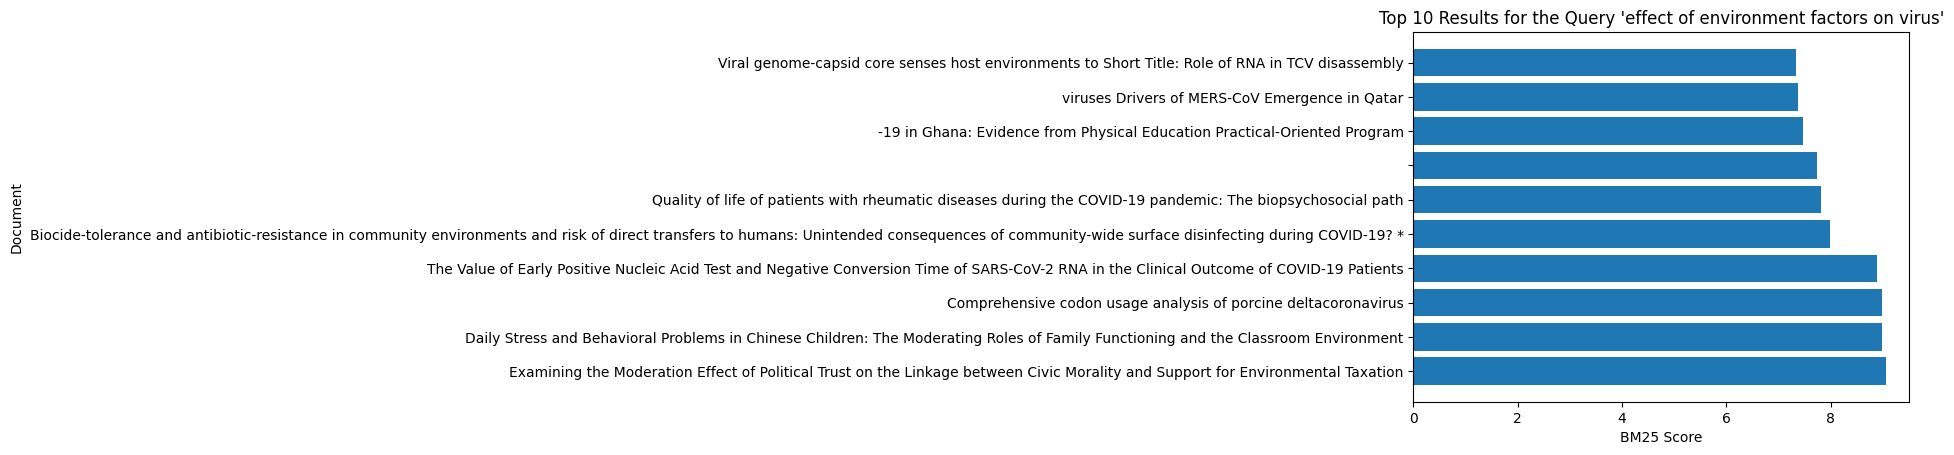

In [42]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces
Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Title: Survival of Enveloped and Non-Enveloped Viruses on Inanimate Surfaces
Abstract: In the present study, we evaluated the viability of non-enveloped viruses, minute virus of mice (MVM) and coxsackievirus B4 (CVB4), and enveloped-viruses, influenza A virus (H1N1) and herpes simplex virus type 1 (HSV-1), on surfaces. We also investigated the impact of the initial concentration of proteins and sodium chloride on the persistence of infectious CVB4 on surfaces. Viral suspensions (>10 4.5 TCID 50 ) were applied to petri dish lids and dried under the air flow of a biosafety cabinet. The recovered viral preparations were titered on appropriate cell lines. Enveloped viruses persisted for less than 5 days while CVB4 and MVM persisted for weeks. However, repetitive cycles of drying and resuspension had a stronger virucidal effect o

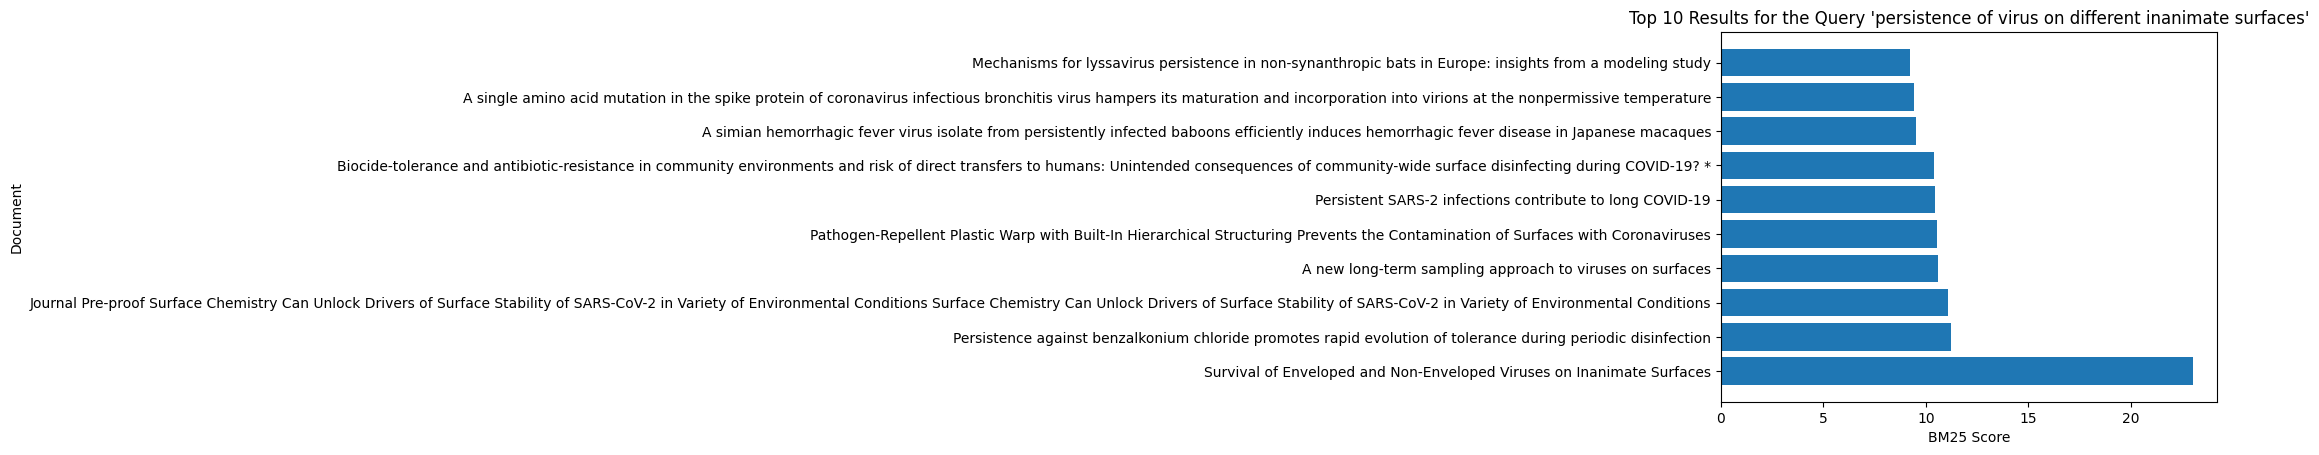

In [43]:
if __name__ == "__main__":
    query = input("Please enter your query: ")
    top_n = 10
    results, scores = search(query, tokenized_corpus, top_n)

    # Print the top results and scores to the console
    print(f"Top {top_n} results for the query '{query}':")
    for result_index, (index, row) in enumerate(results.iterrows()):
        print(f"\nTitle: {row['title']}\nAbstract: {row['abstract']}\nScore: {scores[result_index]}")

    # Create a bar chart of the BM25 scores
    fig, ax = plt.subplots()
    ax.barh(range(len(scores)), scores)
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels([row['title'] for index, row in results.iterrows()])
    ax.set_title(f"Top {top_n} Results for the Query '{query}'")
    ax.set_ylabel("Document")
    ax.set_xlabel("BM25 Score")
    plt.show()